In [1]:
from utilis import *
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
estandarizar=StandardScaler()

### USO DE DATOS SINTETICOS

In [70]:
# creamos el conjunto de datos.
X,Y=make_regression(n_samples=20,n_features=100, n_targets=5,n_informative=4,random_state=6)

# partimos el conjunto de datos.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)#

# estandarizamos.
X_train=estandarizar.fit_transform(X_train)
X_test=estandarizar.transform(X_test)
y_train=estandarizar.fit_transform(y_train)
y_test=estandarizar.transform(y_test)

#Notemos que y es estandarizada, pues la formulación del algoritmo MRCE lo exige
#y si queremos compararlas con el algoritmo REMMAP, tambien deberias hacer lo mismo

### Ejemplo de REMMAP considerando $\lambda_2$ = 0.

In [72]:
# calculamos B usando REMMAP.
B=remMap_l1(matrizX=X_train,matrizY=y_train,l_1=0.1,tmax=10)

# imprimimos el error MSE.
print(np.sum((y_test-(X_test@B))**2))
np.sum(np.sum(B!=0,0))

26.473709676976995


40

### Comparacion utilizando Regresion Multivariada

In [65]:
################################
#REGRESION NORMAL MULTIVARIADA
################################
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(np.sum((y_test-reg.predict(X_test))**2))
np.sum(np.sum(np.absolute(reg.coef_)!=0,1))

55.85036009142471


500

### Ejemplo de REMMAP considerando $\lambda_2\neq 0.$

In [74]:
# calculamos B usando REMMAP.
B=remMap(matrizX=X_train,matrizY=y_train,l_1=.000000001,l_2=.1,tmax=40)

# imprimimos el error MSE.
print(np.sum((y_test-(X_test@B))**2))
np.sum(np.sum(B!=0,0))

15.645286006291386


25

### Ejemplo considerando datos reales

In [77]:
df = pd.read_csv('C:\\Users\\Victor\\Downloads\\datosusa.txt', delimiter = ",",header=None)
k=np.arange(5,147)
df=(df.iloc[:,k])   #quitamos las primeras 5
print(df.shape)
df=df.iloc[(np.sum(df=='?',1)==0).to_numpy(),:]
print(df.shape)

(2215, 142)
(302, 142)


In [78]:
########
###Amputar todos los renglones que tengan al menos un valor faltante
########
k=np.arange(0,124)
X=df.iloc[:,k]
k=np.arange(124,142)
Y=df.iloc[:,k]
X=X.astype('float')
Y=Y.astype('float')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)#
X_train=estandarizar.fit_transform(X_train)
X_test=estandarizar.transform(X_test)
y_train=estandarizar.fit_transform(y_train)
y_test=estandarizar.transform(y_test)
print()
print()

EL mejor valor de lamdba es:
0.251
EL error mas pequeño es:
3325.7118007079926


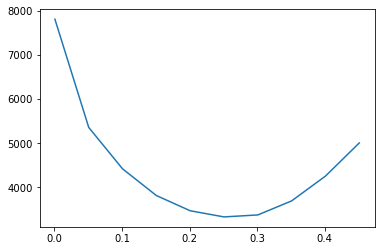

In [79]:
malla=np.arange(0.001,.5,0.05) ; best=10**6 ; mejor_lambda=0 ;evaluacion=[]
for i in malla:
    ###REMMAP_L1
    B=remMap_l1(matrizX=X_train,matrizY=y_train,l_1=i,tmax=1)
    evaluacion.append(np.sum((y_test-(X_test@B))**2))
    if best>np.sum((y_test-(X_test@B))**2):
        best=np.sum((y_test-(X_test@B))**2)
        mejor_lambda=i
print('EL mejor valor de lamdba es:')
print(mejor_lambda)
print('EL error mas pequeño es:')
print(best)
B=remMap_l1(matrizX=X_train,matrizY=y_train,l_1=mejor_lambda,tmax=1)
np.where(B!=0)
np.unique(np.where(B!=0)[1])
plt.plot(malla,evaluacion)

In [13]:
np.unique(np.where(B!=0)[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)